In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from itertools import cycle, islice
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
import seaborn as sns
from collections import Counter
import plotly.express as px
from math import pi
import pygal

In [2]:
from config import cid
from config import secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [3]:
# Using Spotipy library function, to get a list of genres available for the recommendations function.
recommendation_genre_list = sp.recommendation_genre_seeds()

# Creating a list, containing the list of available genres, returned in the 'recommendation_genre_list'
spotify_genre_list = recommendation_genre_list['genres']

# Printing the list, to visually represent genres in scope.
print(spotify_genre_list)

# Determining length of list / how many genres in scope.
print(len(spotify_genre_list))

#pprint(recommendation_genre_list)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [4]:
# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_genre=[]
tracks_name = []
tracks_popularity = []

# List to store track ID's
tracks_id = []

# Initialising a counter, as we iterate through the below for loop 
#counter = 0

# 3 genres had missing data; this caused issues with 'arrays must all be same length in python using pandas DataFrame', which impacted the ability to turn our lists into a DataFrame.
# we therefore decided to remove the genres with missing data.
spotify_genre_list.remove('funk')
spotify_genre_list.remove('new-release')
spotify_genre_list.remove('pop-film')

# Printing spotify_genre_list to verify reove of 'pop-film'
print(spotify_genre_list)

# For loop to iterate through every genre, API call will return songs (limit=100) for ever genre in the list.
for genre in spotify_genre_list:
    randoms = sp.recommendations(seed_genres=[genre], limit=100)
    
# Inner for loop that will try within a range of 100 to append track genre, name, id and popularity
    for album_ind in range(0,100):
        try:
            tracks_genre.append(randoms['seeds'][0]['id'])
            tracks_name.append(randoms['tracks'][album_ind]['name'])
            tracks_id.append(randoms['tracks'][album_ind]['id'])
            tracks_popularity.append(randoms['tracks'][album_ind]['popularity'])
            #print(f"{counter}")
            # Counter adds 1 for every successful for loop iteration
            #counter +=1
            # Error handling, that will print the offending genre name and error message if the for loop fails an iteration for a specific genre in scope.
        except IndexError:
            print(genre)
            print("It didn't work!")      

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'post-dubstep', 'power-pop', 'progressive-house', 'psych-roc

In [5]:
print(len(tracks_name))
print(len(tracks_genre))
print(len(tracks_popularity))

12300
12300
12300


In [6]:
# Dataframe, comprised of values from lists including Genre, Track Name, Track ID and Popularity.
track_dataframe = pd.DataFrame({'Genre':tracks_genre,'Track Name' : tracks_name, 'Track ID' : tracks_id, 'Popularity' : tracks_popularity})

# Also adding column headings, to refernence and populate in next the audio features, for the next API Call.
track_dataframe['Loudness']=""
track_dataframe['Tempo']=""
track_dataframe['Duration_ms']=""
track_dataframe['Energy']=''
track_dataframe['Key']=''
track_dataframe['Instrumentalness']=''
track_dataframe['Speechiness']=''
track_dataframe['Valence']=''
track_dataframe['Danceability']=''
track_dataframe.head()

,Genre,Track Name,Track ID,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,"Keep It Loose, Keep It Tight",69dDr3w8IIcOGKwlW5XntT,53,,,,,,,,,
1,acoustic,Chasing Pavements (Live at Hotel Cafe),5gcj6l37gMBeSAjFnSKeWh,61,,,,,,,,,
2,acoustic,Mess Is Mine,7BVwi9cIzSc6tpyxsp47vJ,65,,,,,,,,,
3,acoustic,No One's Gonna Love You - Live from Spotify Sw...,5MYfpFJYm8WNFGssR6H2Oz,50,,,,,,,,,
4,acoustic,Budapest,48gsLPdOUEDjr7P8Wvykne,53,,,,,,,,,


In [7]:
# Initialising counter, for audio features for loop
counter = 0

# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_loudness =[]
tracks_instrumentalness=[]
tracks_speechiness=[]
tracks_tempo=[]
tracks_duration_ms=[]
tracks_energy=[]
tracks_key=[]
tracks_valence=[]
tracks_danceability =[]

# API CALL 2-2
# For loop, to iterate through every track_id and return the below audio features, we will use as the foundation of the analysis and subsequent figures.
for tid in tracks_id:
    features = sp.audio_features(tid)
    tracks_loudness.append(features[0]['loudness'])
    tracks_instrumentalness.append(features[0]['instrumentalness'])
    tracks_speechiness.append(features[0]['speechiness'])
    tracks_tempo.append(features[0]['tempo'])
    tracks_duration_ms.append(features[0]['duration_ms'])
    tracks_energy.append(features[0]['energy'])
    tracks_key.append(features[0]['key'])
    tracks_valence.append(features[0]['valence'])
    tracks_danceability.append(features[0]['danceability'])
#   Adding to the counter, after every iteration of the for loop
    counter +=1
# Printing the counter, to visualise the process of the for loop
    #print(f"{counter}")




In [8]:
# Assigning / adding returned JSON values to columns in the track_dataframe DataFrame.
track_dataframe['Loudness']= tracks_loudness
track_dataframe['Tempo']= tracks_tempo
track_dataframe['Duration_ms']= tracks_duration_ms
track_dataframe['Energy']= tracks_energy
track_dataframe['Key']= tracks_key
track_dataframe['Instrumentalness']= tracks_instrumentalness
track_dataframe['Speechiness']= tracks_speechiness
track_dataframe['Valence']=tracks_valence
track_dataframe['Danceability']=tracks_danceability

# # Setting the Genre as the index
# track_dataframe=track_dataframe.set_index('Genre')
# track_dataframe.head()


In [9]:
# Removing duplicates, by Track ID, as
cleansed_df = track_dataframe.drop_duplicates(subset='Track ID', keep='first')
cleansed_df.head()

,Genre,Track Name,Track ID,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,"Keep It Loose, Keep It Tight",69dDr3w8IIcOGKwlW5XntT,53,-11.693,131.599,188080,0.232,4,0.000001,0.0451,0.238,0.582
1,acoustic,Chasing Pavements (Live at Hotel Cafe),5gcj6l37gMBeSAjFnSKeWh,61,-9.492,78.075,232200,0.267,0,0.000000,0.0392,0.202,0.545
2,acoustic,Mess Is Mine,7BVwi9cIzSc6tpyxsp47vJ,65,-8.256,108.043,223640,0.723,7,0.028600,0.0349,0.272,0.595
3,acoustic,No One's Gonna Love You - Live from Spotify Sw...,5MYfpFJYm8WNFGssR6H2Oz,50,-10.676,135.657,239080,0.188,1,0.000001,0.0360,0.192,0.547
4,acoustic,Budapest,48gsLPdOUEDjr7P8Wvykne,53,-17.961,127.812,202120,0.247,5,0.000000,0.0311,0.424,0.706


In [10]:
# Writing Cleansed DataFrame to a .csv file
cleansed_df.to_csv("cleansed_df.csv")

In [11]:
cleansed="cleansed_df.csv"
cleansed_df=pd.read_csv(cleansed)
cleansed_df.head()

,Unnamed: 0,Genre,Track Name,Track ID,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,0,acoustic,"Keep It Loose, Keep It Tight",69dDr3w8IIcOGKwlW5XntT,53,-11.693,131.599,188080,0.232,4,0.000001,0.0451,0.238,0.582
1,1,acoustic,Chasing Pavements (Live at Hotel Cafe),5gcj6l37gMBeSAjFnSKeWh,61,-9.492,78.075,232200,0.267,0,0.000000,0.0392,0.202,0.545
2,2,acoustic,Mess Is Mine,7BVwi9cIzSc6tpyxsp47vJ,65,-8.256,108.043,223640,0.723,7,0.028600,0.0349,0.272,0.595
3,3,acoustic,No One's Gonna Love You - Live from Spotify Sw...,5MYfpFJYm8WNFGssR6H2Oz,50,-10.676,135.657,239080,0.188,1,0.000001,0.0360,0.192,0.547
4,4,acoustic,Budapest,48gsLPdOUEDjr7P8Wvykne,53,-17.961,127.812,202120,0.247,5,0.000000,0.0311,0.424,0.706


In [12]:
# Creating Genre-sorted DataFrame
grouped_dataframe=cleansed_df.groupby("Genre")
grouped_dataframe.mean()
grouped_df = pd.DataFrame(grouped_dataframe.mean())
grouped_df

,Unnamed: 0,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
Genre,,,,,,,,,,,
acoustic,49.500000,29.560000,-9.405360,114.588620,236336.180000,0.443183,5.240000,0.036967,0.044393,0.392108,0.545920
afrobeat,149.500000,11.500000,-7.927630,116.666190,282457.740000,0.677111,5.440000,0.103918,0.072930,0.739680,0.674240
alt-rock,249.500000,27.140000,-7.126800,125.013680,252292.830000,0.747640,4.790000,0.095361,0.049302,0.503379,0.472490
alternative,350.381443,44.958763,-5.991979,127.222897,226240.144330,0.756969,5.948454,0.052598,0.056479,0.484991,0.517856
ambient,449.500000,20.450000,-17.452850,110.737630,336955.470000,0.328155,5.050000,0.771058,0.042937,0.137014,0.337864
...,...,...,...,...,...,...,...,...,...,...,...
trance,11849.544444,17.633333,-7.683511,132.538367,363636.277778,0.790822,5.333333,0.506172,0.051853,0.309870,0.587178
trip-hop,11949.483871,23.849462,-9.377634,123.240667,281818.053763,0.580044,5.537634,0.346168,0.075086,0.421151,0.585065
turkish,12049.833333,26.666667,-6.452869,126.203155,243757.559524,0.717857,6.119048,0.010505,0.072377,0.607060,0.627857


In [13]:
grouped_df.reset_index(drop=False, inplace=True)
grouped_df

,Genre,Unnamed: 0,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,49.500000,29.560000,-9.405360,114.588620,236336.180000,0.443183,5.240000,0.036967,0.044393,0.392108,0.545920
1,afrobeat,149.500000,11.500000,-7.927630,116.666190,282457.740000,0.677111,5.440000,0.103918,0.072930,0.739680,0.674240
2,alt-rock,249.500000,27.140000,-7.126800,125.013680,252292.830000,0.747640,4.790000,0.095361,0.049302,0.503379,0.472490
3,alternative,350.381443,44.958763,-5.991979,127.222897,226240.144330,0.756969,5.948454,0.052598,0.056479,0.484991,0.517856
4,ambient,449.500000,20.450000,-17.452850,110.737630,336955.470000,0.328155,5.050000,0.771058,0.042937,0.137014,0.337864
...,...,...,...,...,...,...,...,...,...,...,...,...
117,trance,11849.544444,17.633333,-7.683511,132.538367,363636.277778,0.790822,5.333333,0.506172,0.051853,0.309870,0.587178
118,trip-hop,11949.483871,23.849462,-9.377634,123.240667,281818.053763,0.580044,5.537634,0.346168,0.075086,0.421151,0.585065
119,turkish,12049.833333,26.666667,-6.452869,126.203155,243757.559524,0.717857,6.119048,0.010505,0.072377,0.607060,0.627857
120,work-out,12150.361111,37.888889,-4.947472,131.654528,227598.944444,0.794417,5.944444,0.026768,0.108778,0.629597,0.642639


In [14]:
#Track duration - convert milisecond to second
duration_ms_list = grouped_df['Duration_ms'].tolist()
duration_ms_list
Int = 1000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
#duration_s_list

C:\Users\kathr\OneDrive\Documents\code\.conda\envs\PythonDataViz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/Average_duration_bar_graph.png'

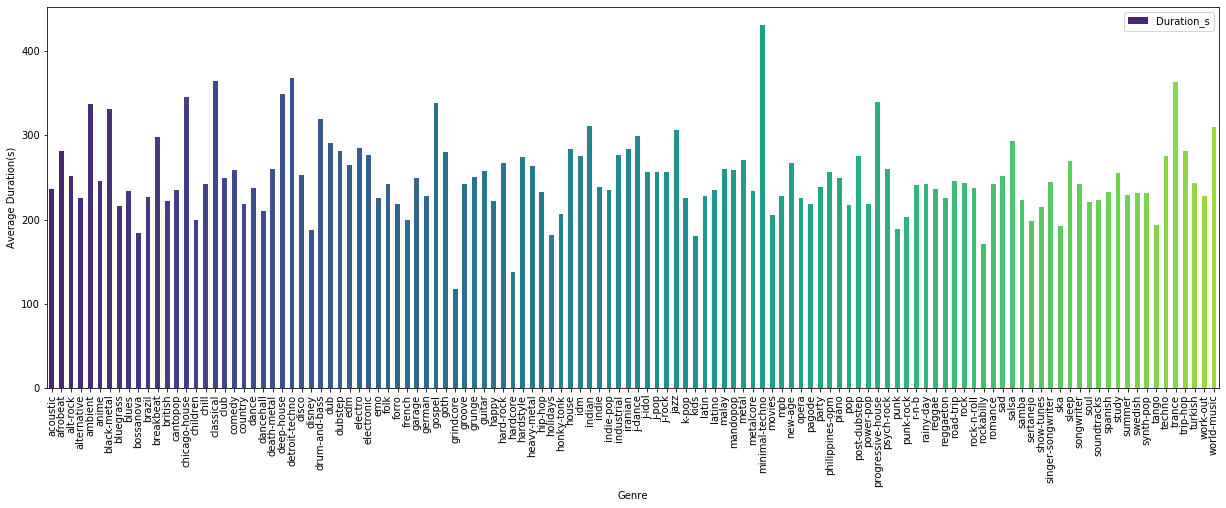

In [15]:
genre_duration = grouped_df[["Genre","Duration_ms"]]
genre_duration['Duration_s']= duration_s_list
genre_duration_s = genre_duration[["Genre","Duration_s"]]
color = cm.viridis(np.linspace(0.1, 0.9, 130))
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Average Duration(s)")
plt.show
plt.savefig("outputs/Average_duration_bar_graph.png")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/Average_Valence_bar_graph.png'

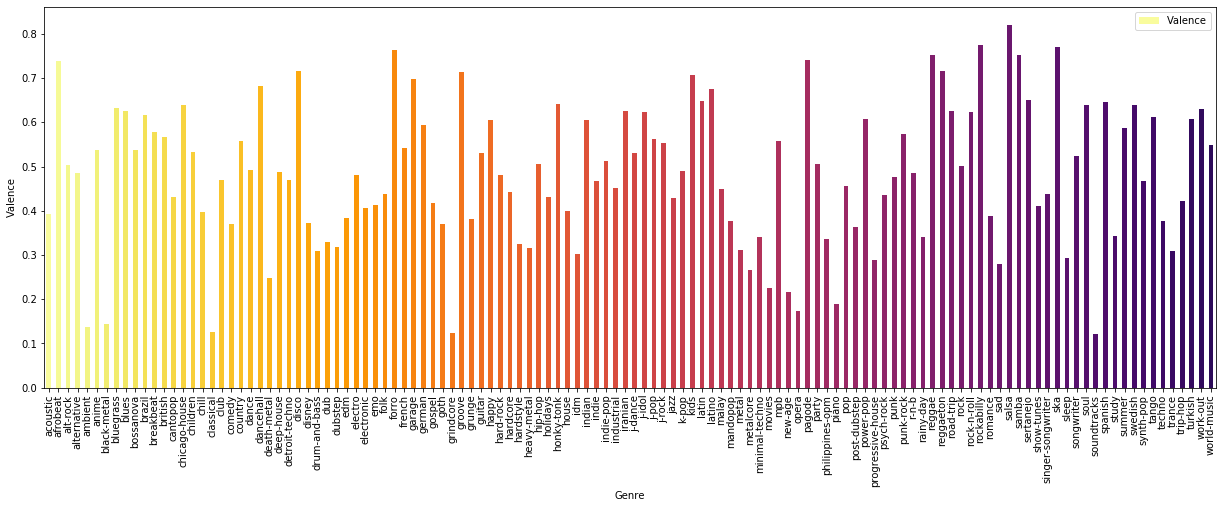

In [16]:
genre_population=grouped_df[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show
plt.savefig("outputs/Average_Valence_bar_graph.png")

In [24]:
#Define function for simple linear regression
def reg(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    
#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    plt.savefig(f"outputs/regress{d}_{i}.png")
    plt.show()

In [20]:
#Define function for scatter
def scatter(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    plt.scatter(x,y)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    plt.savefig(f"outputs/scatter{d}_{i}.png")

    plt.show()

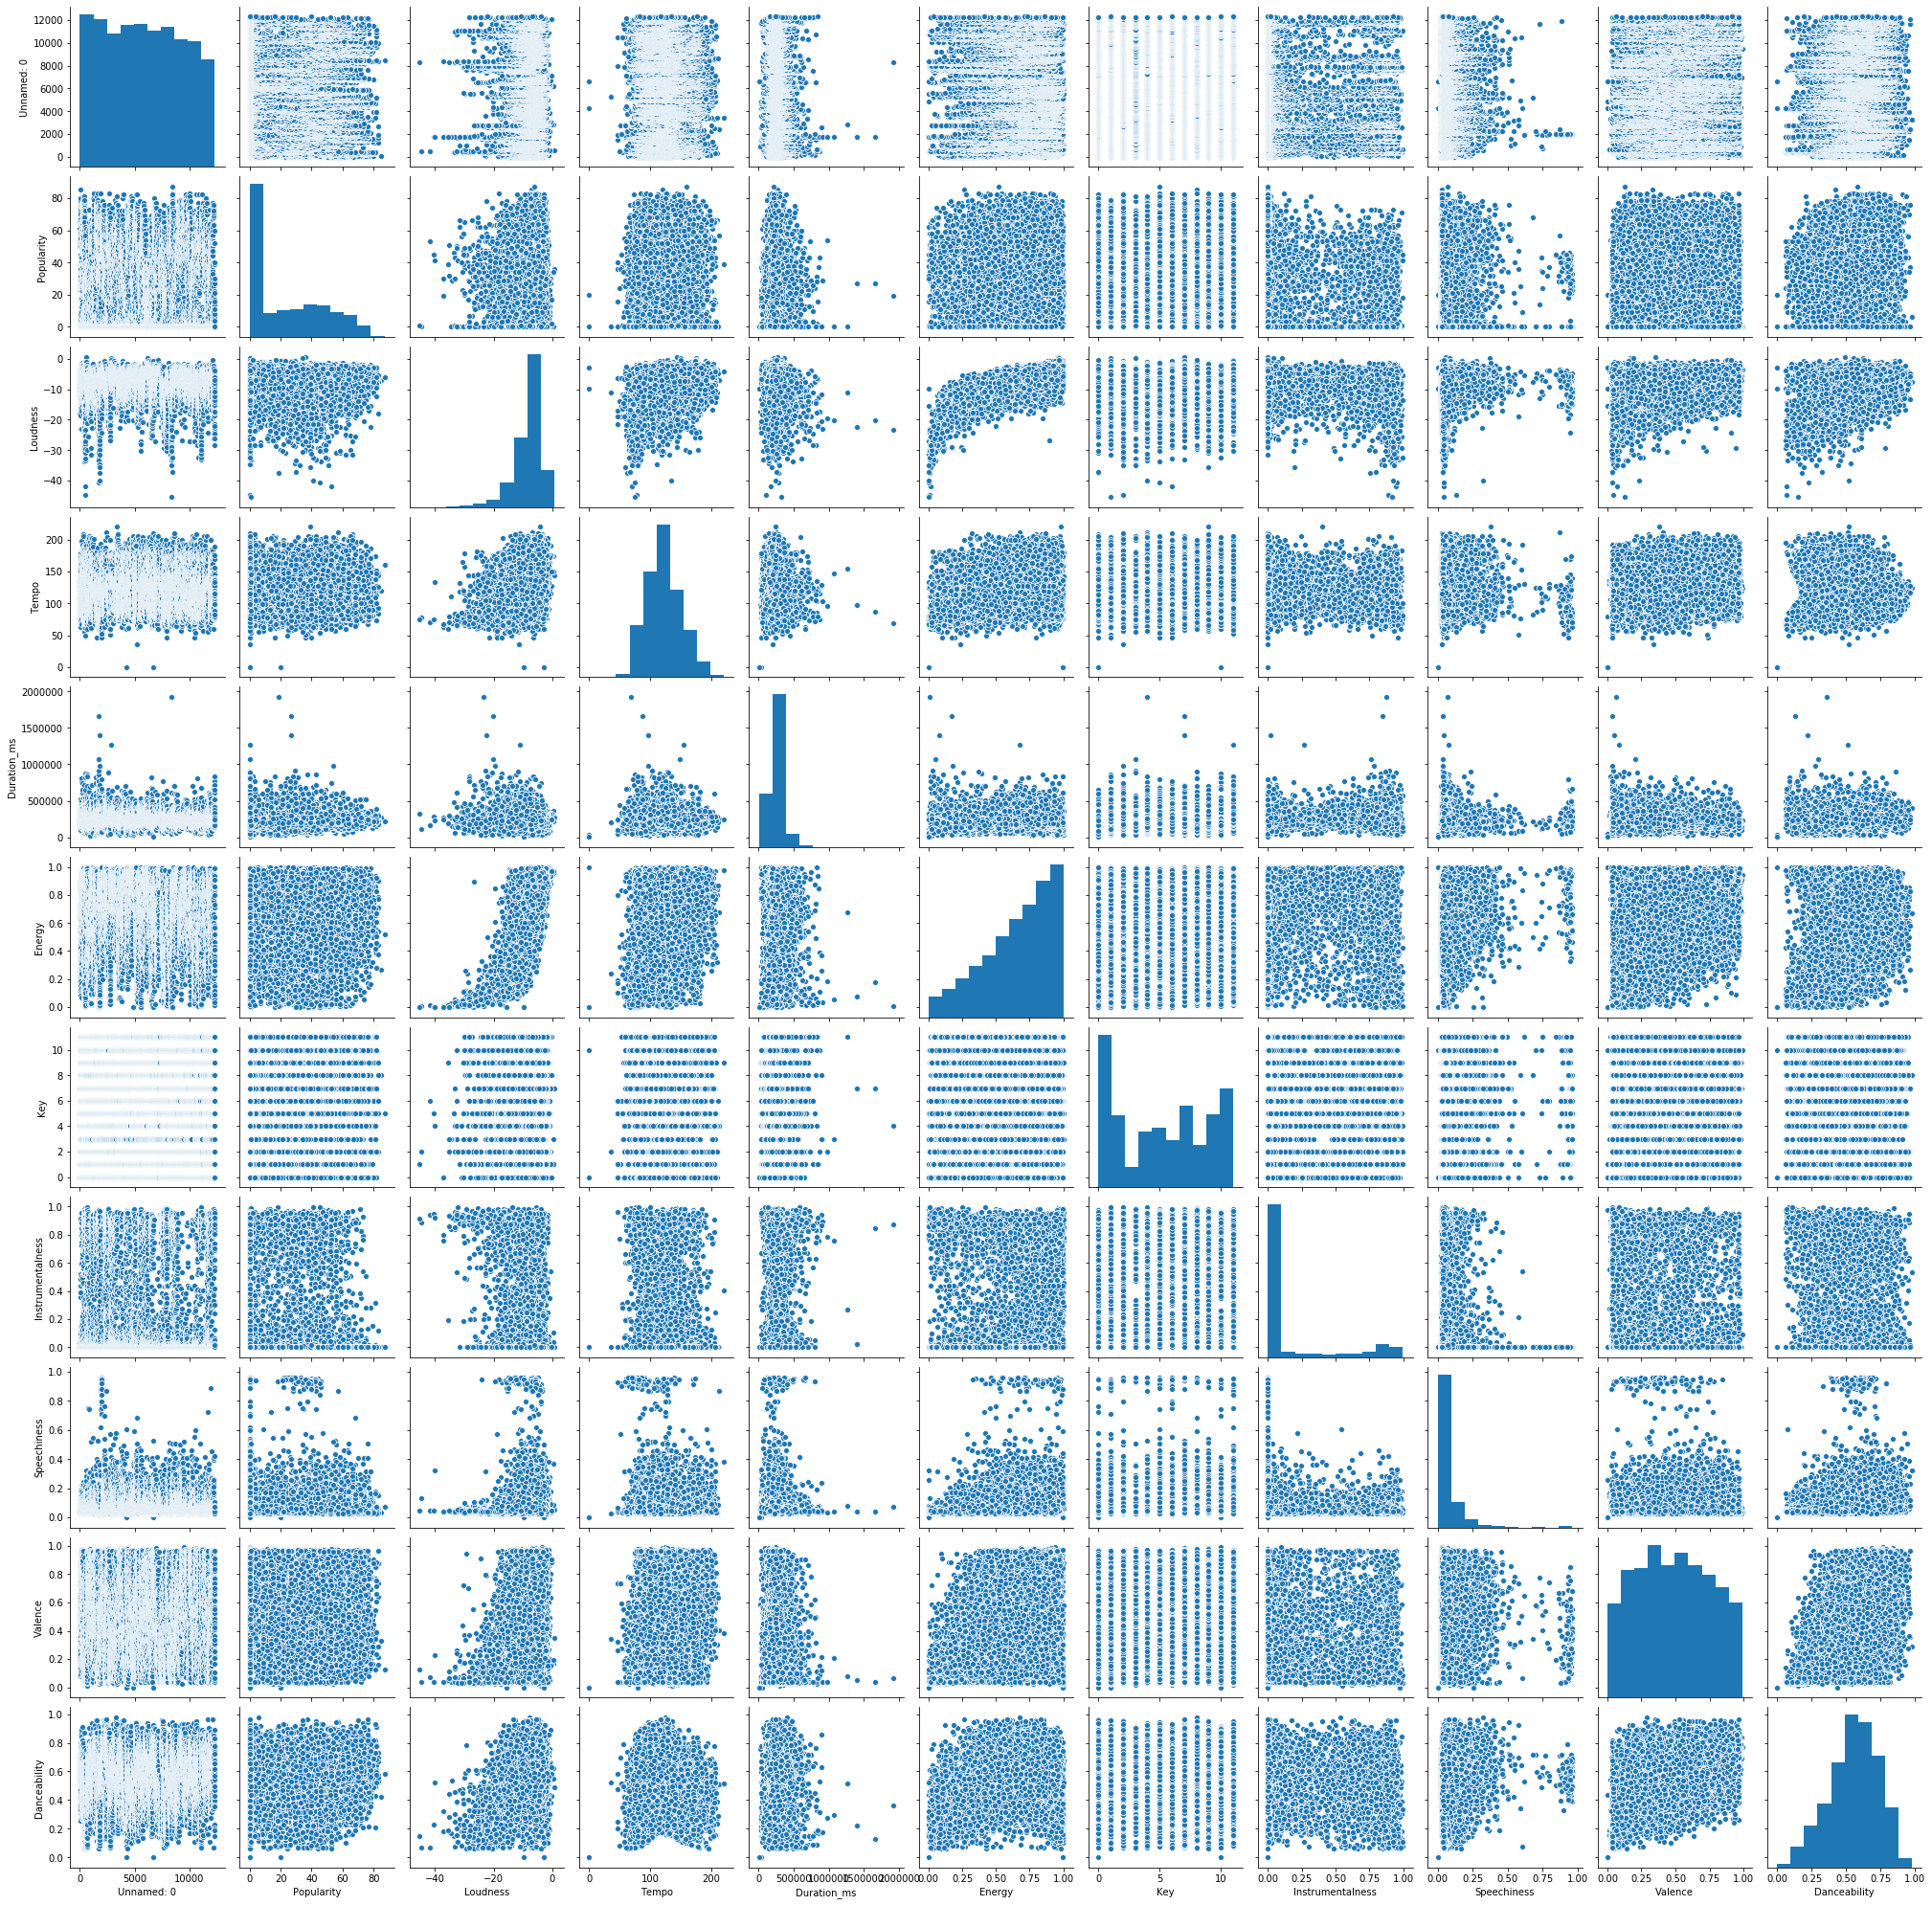

In [17]:
sns.pairplot(cleansed_df)
plt.savefig("all_scatters.png")

In [18]:
print (cleansed_df.corr())

                  Unnamed: 0  Popularity  Loudness     Tempo  Duration_ms  \
Unnamed: 0          1.000000    0.044545 -0.001765 -0.013545    -0.063099   
Popularity          0.044545    1.000000  0.047345 -0.025178    -0.047953   
Loudness           -0.001765    0.047345  1.000000  0.205051    -0.077945   
Tempo              -0.013545   -0.025178  0.205051  1.000000     0.001821   
Duration_ms        -0.063099   -0.047953 -0.077945  0.001821     1.000000   
Energy             -0.067438   -0.012421  0.778241  0.239301    -0.013758   
Key                -0.015862   -0.013733  0.034245  0.016142     0.020974   
Instrumentalness   -0.075833   -0.136171 -0.336324 -0.012919     0.252366   
Speechiness        -0.088927    0.001464  0.069532 -0.026423    -0.023453   
Valence             0.068416   -0.007347  0.271617  0.070655    -0.195786   
Danceability        0.060494    0.014160  0.239542 -0.064312     0.016902   

                    Energy       Key  Instrumentalness  Speechiness   Valen

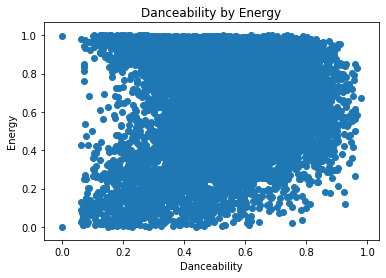

In [21]:
scatter("Danceability","Energy", cleansed_df)

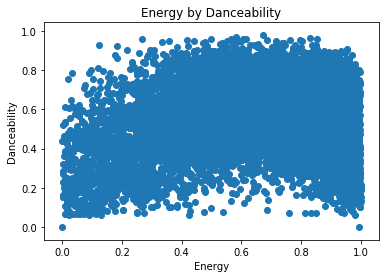

In [22]:
scatter("Energy","Danceability", cleansed_df)

β =[[0.09877616]]
α =[0.48949036]
R^2=0.0194631275852859


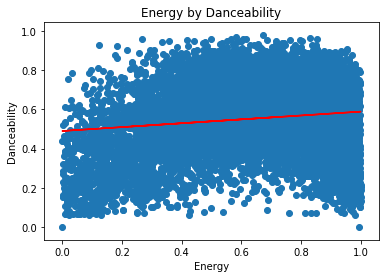

In [25]:
reg("Energy","Danceability", cleansed_df)

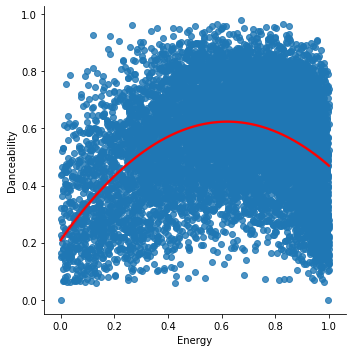

In [26]:
sns.lmplot("Energy","Danceability", cleansed_df, line_kws={'color': 'red'}, order=2)
title="energy_dance_parabola"
plt.title("Energy as a function of Danceability")
plt.savefig(f"outputs/sns{title}.png")

In [27]:
#Generate a list of substantively interesting genres.
#Method: researcher's careful judgment (That's academic language for 
#I made it up. Suggestions for a better list are welcomed.)
substantive_list=["classical","country","electronic","jazz","hip-hop","rock","pop"]

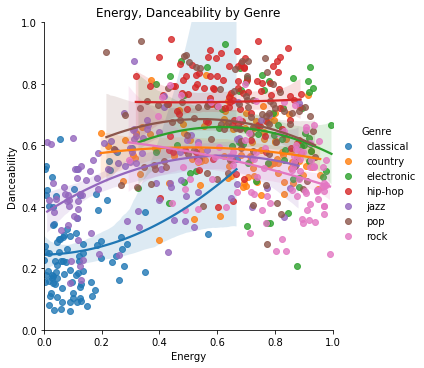

In [37]:
#Compare the relationship for each genre.
#It looks like pop music and rock music have the most "normal" looking relationship.
#We can also see that different genres have very different average energy distributions.

subs_df=cleansed_df.loc[cleansed_df["Genre"].isin(["classical","country","electronic","jazz","hip-hop","rock","pop"])]
sns.lmplot(x="Energy", y="Danceability", data=subs_df ,order=2, hue="Genre")
title="genrelist_parabolas"
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
plt.title("Energy, Danceability by Genre")
plt.savefig(f"outputs/sns{title}.png")

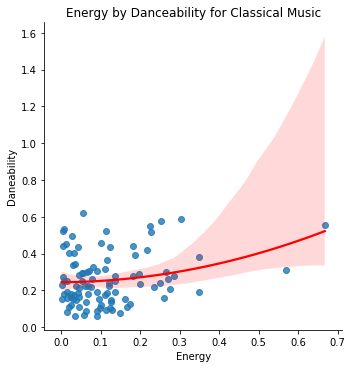

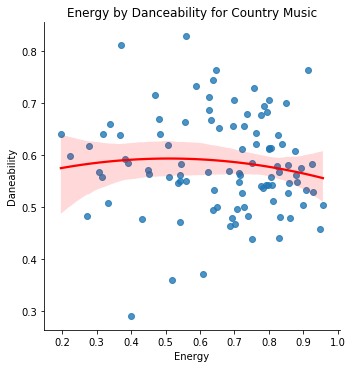

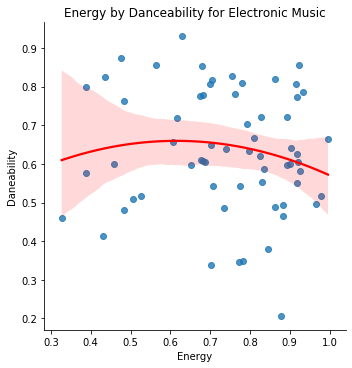

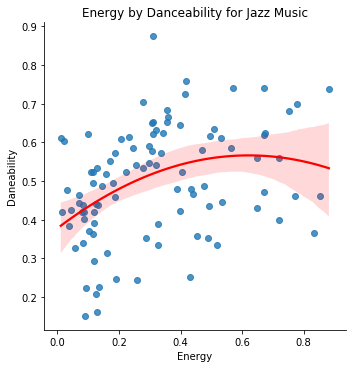

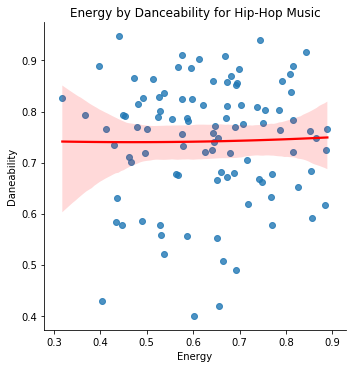

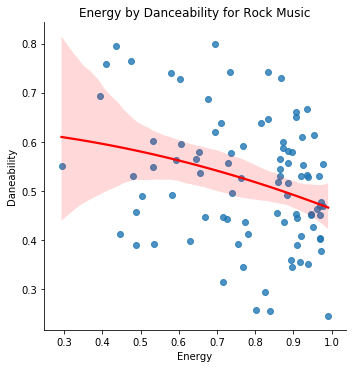

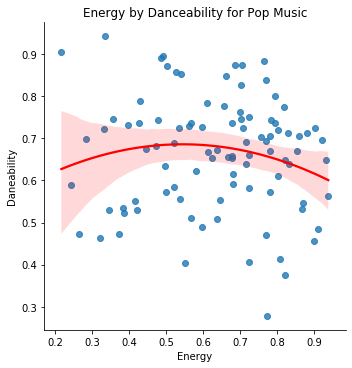

In [29]:
for genre in substantive_list:
    tempframe=cleansed_df.loc[cleansed_df["Genre"]==genre]
    sns.lmplot(x="Energy", y="Danceability", data=tempframe, order=2, line_kws={'color': 'red'})
    plt.title(f"Energy by Danceability for {genre.title()} Music")
    plt.xlabel(f"Energy")
    plt.ylabel(f"Daneability")
    title="by_genre"
    plt.savefig(f"outputs/{title}_{genre}.png")

In [ ]:
# List of languages
language_genre_list = ['brazil', 'british', 'cantopop', 'mandopop', 'french', 'german', 'indian', 'iranian', 'malay', 'philippines-opm', 'spanish', 'swedish', 'turkish']

# DataFrame with average values, by genre
#language_genre_agg = grouped_df.aggregate(np.mean)

# Filtering on languages, as per above list
language_genre_df = grouped_df.filter(language_genre_list, axis=0)
language_genre_df

In [ ]:
# Turning Valence and Energy (measurement scale = 0.0 - 1.0) into percentages, by multiplying by 100
language_genre_df["Energy"] = language_genre_df["Energy"] * 100
language_genre_df["Valence"] = language_genre_df["Valence"] * 100
language_genre_df["Danceability"] = language_genre_df["Danceability"] * 100
language_genre_df["Speechiness"] = language_genre_df["Speechiness"] * 100
language_genre_df

# # Empty list, to store Popularity, Energy and Valence values for each Genre in language_genre_df
genre_values = []

# For loop, that iterates through Popularity, Energy and Valence rows and appends values to the genre_values list
for index, rows in language_genre_df.iterrows():
    my_list = [rows.Popularity, rows.Energy, rows.Valence, rows.Danceability, rows.Speechiness]
    genre_values.append(my_list)   

# # rounding values in nested lists to 2-decimal places.
genre_values = np.round(genre_values, 2)
genre_values

In [ ]:
# Audio features list
audio_features = ["Popularity", "Energy", "Valence", "Danceability", "Speechiness"]

# List of all genre values for Popularity, Energy, Valence

# OTHER bucket genres
brazil_values = [28.42, 60.34, 61.69, 59.97, 5.61]
turkish = [26.61, 70.23, 59.10, 62.56, 6.58]
british_values = [39.99, 73.01, 56.9, 54.32, 5.26]

In [ ]:
# Fig w-1 - European Audio Features

# EUROPEAN genres, containing values
french = [14.26, 53.23, 56.05, 56.66, 6.88]
# Closing each radar shape by contatinating the first and last element of each shape.
french = np.concatenate((french,[french[0]]))

german = [26.65, 71.64, 58.68, 64.01, 9.46] 
# Closing each radar shape by contatinating the first and last element of each shape.
german = np.concatenate((german,[german[0]]))

spanish = [42.25, 72.19, 66.47, 65.83, 5.30]
# Closing each radar shape by contatinating the first and last element of each shape.
spanish = np.concatenate((spanish,[spanish[0]]))

swedish = [31.53, 65.55, 57.13, 55.68, 8.01]
# Closing each radar shape by contatinating the first and last element of each shape.
swedish = np.concatenate((swedish,[swedish[0]]))

In [ ]:
# Calculating evenly-spaced angel coordinates. Using radians for the polar plot with 2 multipled by np pie
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(french))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

In [ ]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, french)
plt.plot(label_placement, german)
plt.plot(label_placement, spanish)
plt.plot(label_placement, swedish)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('European Genre - Audio Attributes', y=1.1)
plt.legend(labels=['French', 'German', 'Spanish', 'Swedish'], loc=(0.95, 0.8))
plt.savefig(f"outputs/European_Genre_Audio_Attributes.png")

In [ ]:
# fig w-2 - # Fig w-1 - Asian Audio Features

# Asian Genres lists, containing values
cantopop = [14.23, 49.55, 43.11, 57.97, 4.06]
# Closing each radar shape by contatinating the first and last element of each shape.
cantopop = np.concatenate((cantopop,[cantopop[0]]))

mandopop = [15.17, 48.86, 34.91, 54.73, 3.75]
# Closing each radar shape by contatinating the first and last element of each shape.
mandopop = np.concatenate((mandopop,[mandopop[0]]))

indian = [26.8 , 66.67, 59.07, 62.05, 6.85]
# Closing each radar shape by contatinating the first and last element of each shape.
indian = np.concatenate((indian,[indian[0]]))

iranian = [21.24, 58.50, 60.02, 56.27, 7.12]
# Closing each radar shape by contatinating the first and last element of each shape.
iranian = np.concatenate((iranian,[iranian[0]]))

malay = [16.61, 55.03, 43.90, 50.84, 3.57]
# Closing each radar shape by contatinating the first and last element of each shape.
malay = np.concatenate((malay,[malay[0]]))

phillippines_opm = [9.95, 45.64, 31.98, 48.08, 3.89]
# Closing each radar shape by contatinating the first and last element of each shape.
phillippines_opm = np.concatenate((phillippines_opm,[phillippines_opm[0]]))

In [ ]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cantopop))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

In [ ]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, cantopop)
plt.plot(label_placement, mandopop)
plt.plot(label_placement, indian)
plt.plot(label_placement, iranian)
plt.plot(label_placement, malay)
plt.plot(label_placement, phillippines_opm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('Asian Genre - Audio Attributes', y=1.1)
plt.legend(labels=['Cantopop', 'Mandopop', 'Indian', 'Iranian', 'Malay', 'Phillippines-OPM'], loc=(0.95, 0.8))
plt.savefig(f"outputs/Asian_Genre_Audio_Attributes.png")

In [ ]:
track_info = pd.read_csv("cleansed_df.csv")
track_info

In [ ]:
#Drop -1 values (None found)
    # Get names of indexes for which column Key has value -1
#indexNames = gkeys[ gkeys['Key'] == -1 ].index
    # Delete these row indexes from dataFrame
#gkeys.drop(indexNames , inplace=True)
    
    #Convert Key Column to string and replace numeric values with Lettered pitch class
track_info['Key'] = track_info['Key'].astype(str)
track_info['Key'].replace({"0": "C", 
                             "1": "C#, Db", 
                             "2": "D", 
                             "3":"D#, Eb",
                             "4": "E", 
                             "5": "F", 
                             "6": "F#, Gb", 
                             "7": "G", 
                             "8": "G#, Ab", 
                             "9": "A", 
                             "10": "A#, Bb", 
                             "11":"B"}, inplace=True)
track_info

In [ ]:
#Print a list of all available genres to choose
genre_counts = track_info["Genre"].value_counts()
pd.set_option('display.max_rows', 1000)
genre_counts

In [ ]:
#input function to get genre
genre = input("Pick a genre... ")
#boolean check if genre matches input, then populates all songs within 'genre' input into new dataframe
genre_check = track_info['Genre']== genre
g_check = track_info[genre_check]
genre_df = pd.DataFrame(g_check)
genre_df

In [ ]:
#Construct dataframe of Key Counts of the Genre-specific dataframe
gkeys = genre_df.loc[:, ["Key"]]
keycounts = gkeys["Key"].value_counts()
keycounts_df = pd.DataFrame(keycounts)
keycounts_df = keycounts_df.rename(columns={"Key":"Count"})
keycounts_df

In [ ]:
#Plot Key Counts Dataframe
#Assign variables
colors = ['#3505FF', '#A311FF', '#FF1DF7', '#FF299D', '#FF354E', '#FF7941', '#FFCC4D', '#E8FF59', '#AAFF65', '#75FF71', '#7DFFB0', '#8AFFE9']
labels = list(keycounts_df.index.values)
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#plot
keycounts_df.plot.pie(y='Count', colors = colors, labels=labels, legend=None, autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.05, explode = explode, startangle=90, figsize=(8,8))

#Create center circle for donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Format Title and Labels and save
plt.title('Song Key Percentages of ' + genre + ' Genre', fontsize=20)
plt.ylabel('% of Songs in Each Key', fontsize=16)
plt.tight_layout()
plt.savefig('outputs/' + genre + '_keys.png')